In [128]:
# === 셀 요약 =========================================
# 목적: 라이브러리 임포트 및 전역 설정
# =====================================================
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 주피터 노트북 내에서 그래프를 바로 표시
%matplotlib inline

sns.set_style('darkgrid')

In [129]:
# === 셀 요약 =========================================
# 목적: 데이터 로드 및 기본 확인
# =====================================================
# CSV 파일 로드 → 데이터프레임 생성
df = pd.read_csv(r"C:\Users\USER\Downloads\high_diamond_ranked_10min.csv\high_diamond_ranked_10min.csv", encoding= 'utf-8')
# 상위 몇 행 미리보기
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [130]:
# === 셀 요약 =========================================
# 목적: 데이터 미리보기/기초 통계/결측/중복 확인
# =====================================================
# 열 타입/결측 개요 출력
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [131]:
# === 셀 요약 =========================================
# 목적: 데이터 미리보기/기초 통계/결측/중복 확인
# =====================================================
# 결측치 여부 확인
df.isnull().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

In [146]:
# === 셀 요약 =========================================
# 목적: 기타 분석/실험 코드
# =====================================================
df['blueWins'].mean() * 100

np.float64(49.903836420690354)

In [147]:
# === 셀 요약 =========================================
# 목적: 기타 분석/실험 코드
# =====================================================
((df['blueTotalGold'] > df['redTotalGold']) & (df['blueWins'] == 1)).mean() * 100

np.float64(36.197995748557545)

In [148]:
# === 셀 요약 =========================================
# 목적: 기타 분석/실험 코드
# =====================================================
((df['blueFirstBlood'] == 1) & (df['blueWins'] == 1)).mean() * 100

np.float64(30.23585383135945)

In [149]:
# === 셀 요약 =========================================
# 목적: 그룹 연산/빈도 분석/피벗 요약
# =====================================================
# 그룹 집계 연산
df.groupby('blueFirstBlood')['blueWins'].mean() * 100

blueFirstBlood
0    39.717907
1    59.895729
Name: blueWins, dtype: float64

In [150]:
# === 셀 요약 =========================================
# 목적: 기타 분석/실험 코드
# =====================================================
cond = (df['blueTotalGold'] > df['redTotalGold']) & (df['blueFirstBlood'] > df['redFirstBlood'] & (df['blueEliteMonsters'] > df['redEliteMonsters']))

In [151]:
# === 셀 요약 =========================================
# 목적: 데이터 가공/조건 필터링/머지
# =====================================================
print(df.loc[cond, 'blueWins'].mean() * 100)

74.3099787685775


In [152]:
# === 셀 요약 =========================================
# 목적: 데이터 가공/조건 필터링/머지
# =====================================================
con = (df['blueDragons'] > df['redDragons']) & (df['blueHeralds'] > df['redHeralds'])
print(df.loc[con, 'blueWins'].mean() * 100)

73.52112676056338


In [153]:
# === 셀 요약 =========================================
# 목적: 데이터 가공/조건 필터링/머지
# =====================================================
cons = (df['blueTowersDestroyed'] > df['redTowersDestroyed'])
print(df.loc[cons, 'blueWins'].mean() * 100)

75.96371882086169


In [154]:
# === 셀 요약 =========================================
# 목적: 데이터 가공/조건 필터링/머지
# =====================================================
df.query('blueDragons > redDragons & blueHeralds > redHeralds')['blueWins'].mean() * 100

np.float64(73.52112676056338)

In [155]:
# === 셀 요약 =========================================
# 목적: 데이터 가공/조건 필터링/머지
# =====================================================
df.query('blueTowersDestroyed > redTowersDestroyed')['blueWins'].mean() * 100

np.float64(75.96371882086169)

In [156]:
# === 셀 요약 =========================================
# 목적: 그룹 연산/빈도 분석/피벗 요약
# =====================================================
total['obj_get'] = (df['blueDragons'] > df['redDragons']) & (df['blueHeralds'] > df['redHeralds'])
# 그룹 집계 연산
total.groupby('obj_get')['target'].mean() * 100

obj_get
False    48.075035
True     73.521127
Name: target, dtype: float64

In [157]:
# === 셀 요약 =========================================
# 목적: 데이터 미리보기/기초 통계/결측/중복 확인
# =====================================================
# 상위 몇 행 미리보기
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [158]:
# === 셀 요약 =========================================
# 목적: 기타 분석/실험 코드
# =====================================================
cols = ['gameId', 'redFirstBlood', 'redKills', 'redEliteMonsters', 'redDragons','redTotalMinionsKilled',
       'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin', 'redHeralds',
       'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin', 'blueTotalMinionsKilled']

In [159]:
# === 셀 요약 =========================================
# 목적: 기타 분석/실험 코드
# =====================================================
df_clean = df.copy()

In [160]:
# === 셀 요약 =========================================
# 목적: 기타 분석/실험 코드
# =====================================================
df_clean = df_clean.drop(cols, axis = 1)

In [161]:
# === 셀 요약 =========================================
# 목적: 기타 분석/실험 코드
# =====================================================
df_clean

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,blueTotalExperience,blueTotalJungleMinionsKilled,redWardsPlaced,redWardsDestroyed,redDeaths,redAssists,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience
0,0,28,2,1,9,6,11,0,0,0,...,17039,36,15,6,9,8,0,16567,6.8,17047
1,0,12,1,0,5,5,5,0,0,0,...,16265,43,12,1,5,2,1,17620,6.8,17438
2,0,15,0,0,7,11,4,1,1,0,...,16221,46,15,3,7,14,0,17285,6.8,17254
3,0,43,1,0,4,5,5,1,0,1,...,17954,55,15,2,4,10,0,16478,7.0,17961
4,0,75,4,0,6,6,6,0,0,0,...,18543,57,17,2,6,7,0,17404,7.0,18313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,7,4,5,1,1,0,...,18967,69,46,3,7,7,0,15246,6.8,16498
9875,1,54,0,0,6,4,8,1,1,0,...,19255,48,12,21,6,3,0,15456,7.0,18367
9876,0,23,1,0,6,7,5,0,0,0,...,18032,45,14,0,6,11,0,18319,7.4,19909
9877,0,14,4,1,2,3,3,1,1,0,...,17229,48,66,4,2,1,0,15298,7.2,18314


In [162]:
# === 셀 요약 =========================================
# 목적: 데이터 미리보기/기초 통계/결측/중복 확인
# =====================================================
# 열 타입/결측 개요 출력
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueEliteMonsters             9879 non-null   int64  
 8   blueDragons                   9879 non-null   int64  
 9   blueHeralds                   9879 non-null   int64  
 10  blueTowersDestroyed           9879 non-null   int64  
 11  blueTotalGold                 9879 non-null   int64  
 12  blueAvgLevel                  9879 non-null   float64
 13  blu

c:\Users\USER\.conda\envs\py3128\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


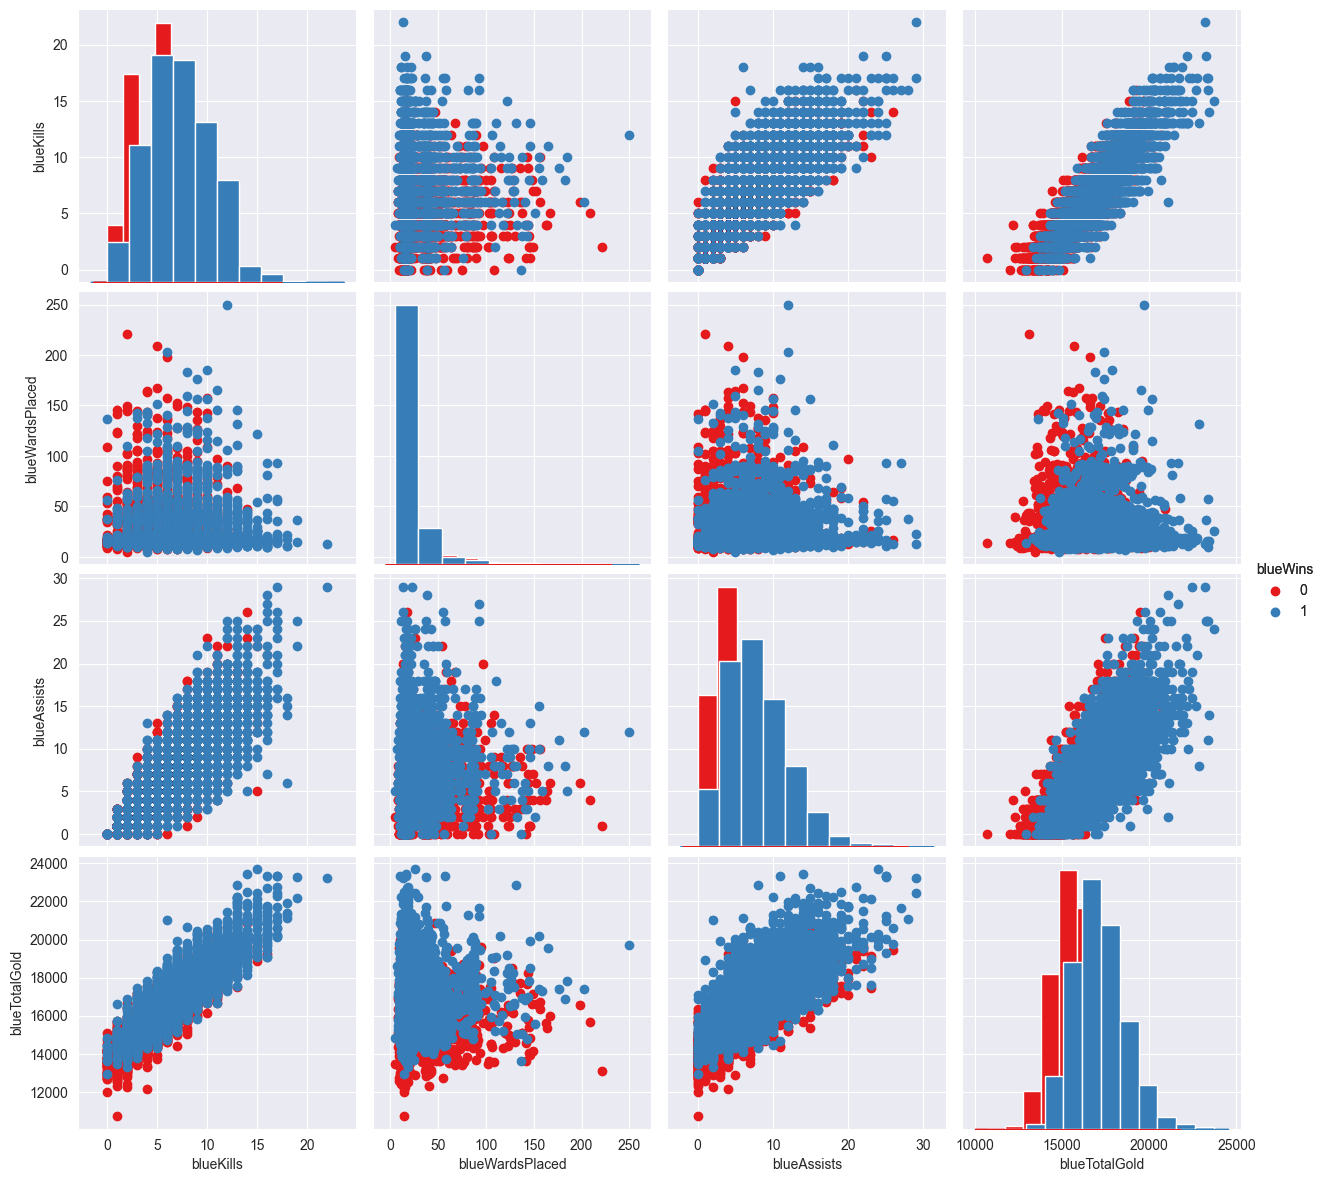

In [163]:
# === 셀 요약 =========================================
# 목적: 시각화/상관 분석
# =====================================================
g = sns.pairplot(data=df_clean , vars = ['blueKills', 'blueWardsPlaced','blueAssists','blueTotalGold'], hue ='blueWins', size= 3, palette='Set1')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

<Axes: >

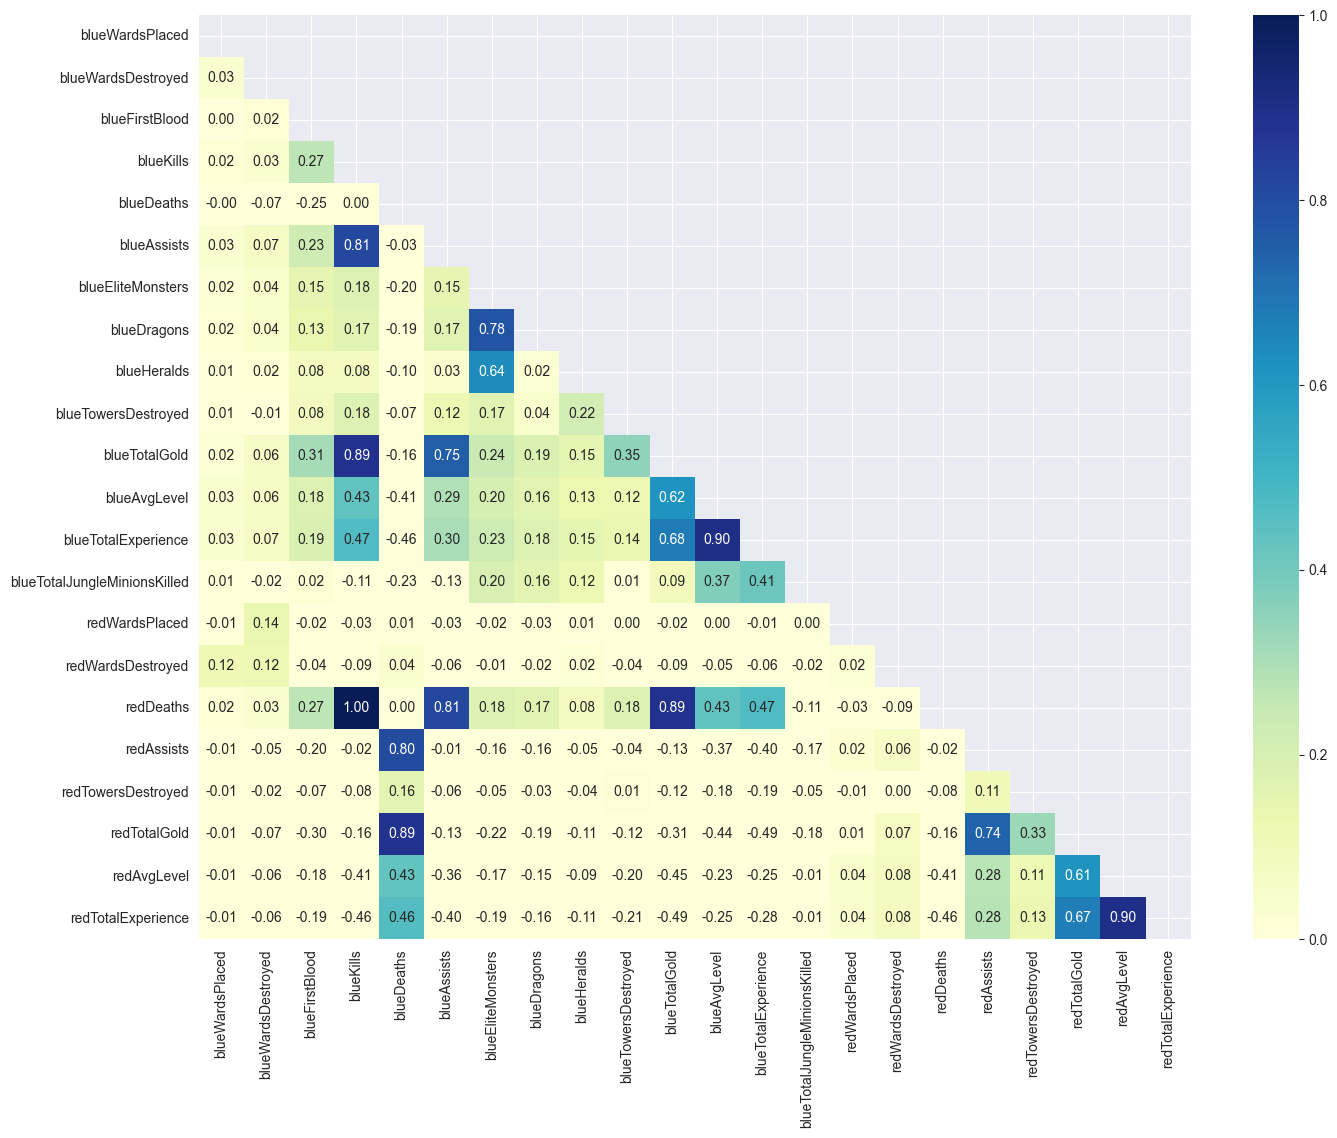

In [164]:
# === 셀 요약 =========================================
# 목적: 시각화/상관 분석
# =====================================================
plt.figure(figsize=(16, 12))
# 상관계수 행렬 계산
mask = np.triu(np.ones_like(df_clean.drop('blueWins', axis= 1).corr(), dtype=bool))
# 상관계수 행렬 계산
# 히트맵 시각화
sns.heatmap(df_clean.drop('blueWins', axis= 1).corr(), cmap= 'YlGnBu', annot=True, fmt= '.2f', vmin=0, mask=mask)

In [165]:
# === 셀 요약 =========================================
# 목적: 기타 분석/실험 코드
# =====================================================
cols = ['blueAvgLevel', 'redWardsPlaced', 'redWardsDestroyed', 'redDeaths', 'redAssists', 'redTowersDestroyed',
       'redTotalExperience', 'redTotalGold', 'redAvgLevel']

df_clean = df_clean.drop(cols , axis= 1)


In [166]:
# === 셀 요약 =========================================
# 목적: 시각화/상관 분석
# =====================================================
# 상관계수 행렬 계산
corr_list = df_clean[df_clean.columns[1:]].apply(lambda x: x.corr(df_clean['blueWins']))
cols = []
for col in corr_list.index:
    if (corr_list[col]> 0.2 or corr_list[col]<-0.2):
        cols.append(col)
cols

['blueFirstBlood',
 'blueKills',
 'blueDeaths',
 'blueAssists',
 'blueEliteMonsters',
 'blueDragons',
 'blueTotalGold',
 'blueTotalExperience']

In [167]:
# === 셀 요약 =========================================
# 목적: 기타 분석/실험 코드
# =====================================================
df_clean = df_clean[cols]

In [168]:
# === 셀 요약 =========================================
# 목적: 데이터 미리보기/기초 통계/결측/중복 확인
# =====================================================
# 상위 몇 행 미리보기
df_clean.head()

,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueTotalGold,blueTotalExperience
0,1,9,6,11,0,0,17210,17039
1,0,5,5,5,0,0,14712,16265
2,0,7,11,4,1,1,16113,16221
3,0,4,5,5,1,0,15157,17954
4,0,6,6,6,0,0,16400,18543


In [169]:
# === 셀 요약 =========================================
# 목적: 데이터 미리보기/기초 통계/결측/중복 확인
# =====================================================
# 열 타입/결측 개요 출력
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   blueFirstBlood       9879 non-null   int64
 1   blueKills            9879 non-null   int64
 2   blueDeaths           9879 non-null   int64
 3   blueAssists          9879 non-null   int64
 4   blueEliteMonsters    9879 non-null   int64
 5   blueDragons          9879 non-null   int64
 6   blueTotalGold        9879 non-null   int64
 7   blueTotalExperience  9879 non-null   int64
dtypes: int64(8)
memory usage: 617.6 KB


array([[<Axes: title={'center': 'blueFirstBlood'}>,
        <Axes: title={'center': 'blueKills'}>,
        <Axes: title={'center': 'blueDeaths'}>],
       [<Axes: title={'center': 'blueAssists'}>,
        <Axes: title={'center': 'blueEliteMonsters'}>,
        <Axes: title={'center': 'blueDragons'}>],
       [<Axes: title={'center': 'blueTotalGold'}>,
        <Axes: title={'center': 'blueTotalExperience'}>, <Axes: >]],
      dtype=object)

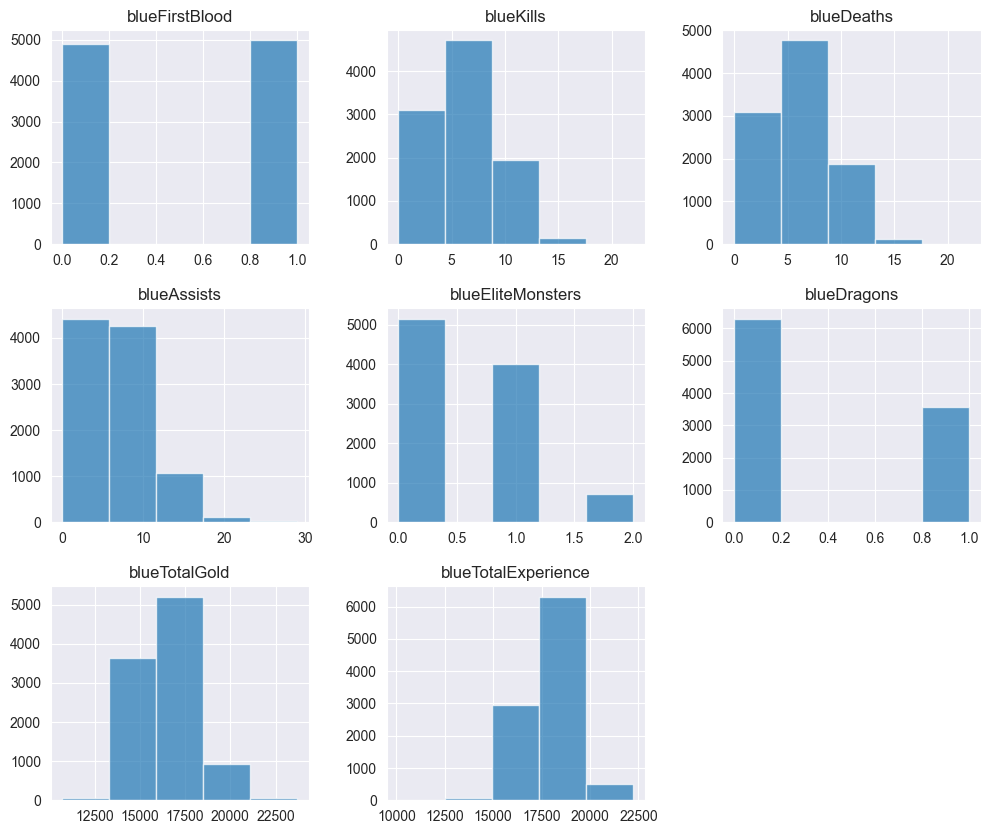

In [170]:
# === 셀 요약 =========================================
# 목적: 시각화/상관 분석
# =====================================================
df_clean.hist(alpha = 0.7, figsize=(12,10), bins= 5)

In [171]:
# === 셀 요약 =========================================
# 목적: 머신러닝 학습/평가
# =====================================================
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X = df_clean
Y = df['blueWins']
# 0~1 정규화 스케일러 정의
scaler = MinMaxScaler()
# 학습 데이터 분포(최소/최대)로 스케일러 적합
scaler.fit(X)
# 스케일러로 데이터 변환(정규화)
X = scaler.transform(X)

In [172]:
# === 셀 요약 =========================================
# 목적: 머신러닝 학습/평가
# =====================================================
# 학습/평가용 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [173]:
# === 셀 요약 =========================================
# 목적: 기타 분석/실험 코드
# =====================================================
X_train.shape, X_test.shape , y_train.shape , y_test.shape

((7903, 8), (1976, 8), (7903,), (1976,))

In [174]:
# === 셀 요약 =========================================
# 목적: 머신러닝 학습/평가
# =====================================================
from sklearn.naive_bayes import GaussianNB
# 모델 성능 지표 계산
from sklearn.metrics import accuracy_score

clf_nb = GaussianNB()
# 모델 학습
clf_nb.fit(X_train, y_train)

# 학습한 모델로 예측
pred_nb = clf_nb.predict(X_test)

In [175]:
# === 셀 요약 =========================================
# 목적: 머신러닝 학습/평가
# =====================================================
# 모델 성능 지표 계산
acc_nb = accuracy_score(pred_nb, y_test)
print(acc_nb)

0.7176113360323887


In [176]:
# === 셀 요약 =========================================
# 목적: 머신러닝 학습/평가
# =====================================================
from sklearn import tree
from sklearn.model_selection import GridSearchCV

tree = tree.DecisionTreeClassifier()

grid = {'min_samples_split' : [5,10,20,50,100]}

clf_tree = GridSearchCV(tree, grid, cv=5)
# 모델 학습
clf_tree.fit(X_train, y_train)

# 학습한 모델로 예측
pred_tree = clf_tree.predict(X_test)

# 모델 성능 지표 계산
acc_tree = accuracy_score(pred_tree, y_test)
print(acc_tree)

0.6928137651821862


In [177]:
# === 셀 요약 =========================================
# 목적: 머신러닝 학습/평가
# =====================================================
# 랜덤포레스트 분류기 정의
from sklearn.ensemble import RandomForestClassifier
# 랜덤포레스트 분류기 정의
rf = RandomForestClassifier()

grid = {'n_estimators': [100,200,300,400,500], 'max_depth': [2,5,10]}

clf_rf = GridSearchCV(rf, grid, cv=5)
# 모델 학습
clf_rf.fit(X_train, y_train)

# 학습한 모델로 예측
pred_rf = clf_rf.predict(X_test)

# 모델 성능 지표 계산
acc_rf = accuracy_score(pred_rf, y_test)
print(acc_rf)

0.7272267206477733


In [ ]:
# === 셀 요약 =========================================
# 목적: 기타 분석/실험 코드
# =====================================================
